<a href="https://colab.research.google.com/github/carbform/Climate_Data_Plotting/blob/main/point_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%matplotlib inline

import os, sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.transforms import offset_copy
import numpy as np
#matplotlib.rcParams.update({'font.size': 14})
import matplotlib.patheffects as pe
!pip install geopandas
!pip install contextily
!pip install rasterio
!pip install shapely
!pip install Basemap




#from matplotlib_scalebar.scalebar import ScaleBar

import geopandas as gpd
import contextily as ctx
import rasterio
from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap


# import cartopy.crs as ccrs
# import cartopy
# import cartopy.feature as cfeature
# import cartopy.io.img_tiles as cimgt
# from cartopy.feature import ShapelyFeature
# from cartopy.io.shapereader import Reader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Vandana_Map/stationTrend.csv')


Mounted at /content/gdrive


In [3]:

df

,Station Name,Lat,Lon
0,Cochin,9.9670,76.267
1,Visakhapatnam,17.6830,83.283
2,Mormugao,15.4167,73.800
3,Chennai,13.1000,80.300
4,Haldia,22.0300,88.100
5,Okha,22.4670,69.083
6,Paradip,20.2600,86.700
7,Port Blair,11.6830,92.767


In [4]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
geo_df

,Station Name,Lat,Lon,geometry
0,Cochin,9.9670,76.267,POINT (76.26700 9.96700)
1,Visakhapatnam,17.6830,83.283,POINT (83.28300 17.68300)
2,Mormugao,15.4167,73.800,POINT (73.80000 15.41670)
3,Chennai,13.1000,80.300,POINT (80.30000 13.10000)
4,Haldia,22.0300,88.100,POINT (88.10000 22.03000)
5,Okha,22.4670,69.083,POINT (69.08300 22.46700)
6,Paradip,20.2600,86.700,POINT (86.70000 20.26000)
7,Port Blair,11.6830,92.767,POINT (92.76700 11.68300)


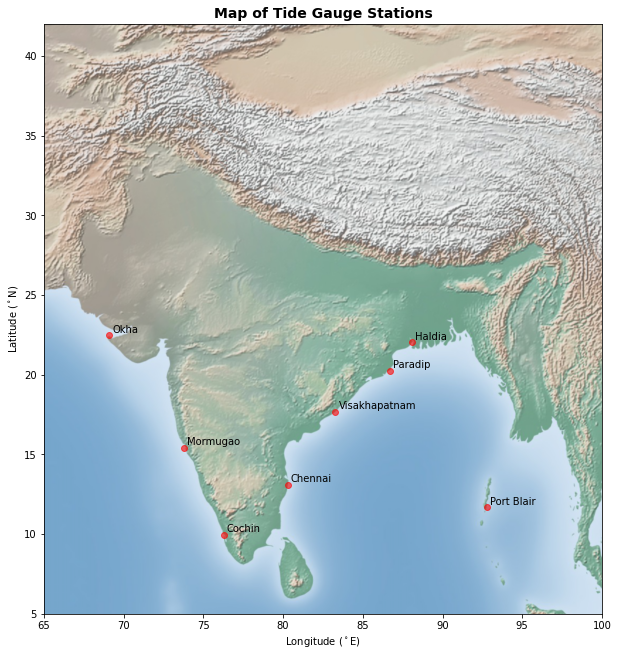

In [11]:
# Plot
fig, ax = plt.subplots(figsize = (10,16))
m = Basemap(projection='cyl',llcrnrlat=5,urcrnrlat=42, llcrnrlon=65,urcrnrlon=100, resolution='l', 
            suppress_ticks=False)

# feature/polygons
geo_df.plot(ax=ax, c='red', alpha=0.6)


m.shadedrelief()

# add point labels
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df['Station Name']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    
    
ax.set_title('Map of Tide Gauge Stations', size=14, fontweight="bold")
plt.xlabel('Longitude ($^\circ$E)')
plt.ylabel('Latitude ($^\circ$N)')

#plt.show()
plt.savefig("/content/gdrive/MyDrive/Vandana_Map/stationTrend.png", dpi=300, bbox_inches ="tight", pad_inches = 0)